# *Introduction to Probability*

### Probability Basics

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

flags = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", header=None)
flags.columns = ['name', 'landmass', 'zone', 'area', 'population', 'language',
       'religion', 'bars', 'stripes', 'colors', 'red', 'green', 'blue', 'gold',
       'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires',
       'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate',
       'text', 'topleft', 'botright']
print(flags.shape, '\n')
flags.head()

(194, 30) 



name  landmass  zone  area  population  language  religion  bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   stripes  colors  red  green  blue  gold  white  black  orange mainhue  \
0        3       5    1      1     0     1      1      1       0   green   
1        0       3    1      0     0     1      0      1       0     red   
2        0       3    1      1     0     0      1      0       0   green   
3        0       5    1      0     1     1      1      0       1    blue   
4        0       3    1      0     1     1      0      0       0    gold   

   circles  crosses  saltires  quarters  sunstars  crescent  triangle  icon  \
0        0        0         0         0         1         0         0     1   
1        0        0         0         0         1         0         0     0   
2        0        0         0         0         1         1         0     0   
3        0        0         0         0         0         0         1     1   
4        0        0         0         0         0         0         0     0   

   animate  text topleft botright  
0        0     0   black    green  
1        1     0     red      red  
2        0     0   green    white  
3        1     0    blue      red  
4        0     0    blue      red

In [2]:
most_bars = max(flags['bars'])
most_bars_country = flags[flags['bars'] == most_bars]['name']
print(most_bars_country, '\n')

highest_population = flags['population'].max()
highest_population_country = flags[flags['population'] == highest_population]['name']
print(highest_population_country)

161    St-Vincent
Name: name, dtype: object 

37    China
Name: name, dtype: object


### Calculating Probability

In [3]:
total_countries = flags.shape[0]

orange_flags = flags[flags['orange']==1]
print(orange_flags.shape[0])

orange_probability = orange_flags.shape[0]/total_countries
print(orange_probability, '\n')

stripes_flags = flags[flags['stripes'] > 1]
print(stripes_flags.shape[0])

stripe_probability = stripes_flags.shape[0]/total_countries
print(stripe_probability)

26
0.13402061855670103 

80
0.41237113402061853


### Conjuctive Probabilities

In [4]:
five_heads = .5 ** 5
print(five_heads)

ten_heads = .5 ** 10
print(ten_heads)

hundred_heads = .5 ** 100
print(hundred_heads)

0.03125
0.0009765625
7.888609052210118e-31


### Dependent Probabilities

In [5]:
total_countries

red_flags = flags[flags['red'] == 1].shape[0]
print(red_flags)

three_red = (red_flags/total_countries) * (red_flags-1)/(total_countries-1) * (red_flags-2)/(total_countries-2)
print(three_red)

153
0.48848552427754927


### Disjunctive Probability

In [6]:
start = 1
end = 18000

def calc_evenly_divisible(start, end, value):
    divisibles = 0
    
    for i in range(start, end+1):
        if (i % value == 0):
            divisibles += 1
    return divisibles

hundred_prob = calc_evenly_divisible(start, end, 100)/end
seventy_prob = calc_evenly_divisible(start, end, 70)/end

print(hundred_prob)
print(seventy_prob)        

0.01
0.014277777777777778


### Disjunctive Dependent Probabilities

In [7]:
total_countries = flags.shape[0]

orange_prob = flags[flags['orange']==1].shape[0]/total_countries
print(orange_prob)

red_prob = flags[flags['red']==1].shape[0]/total_countries
print(red_prob)

red_n_orange_prob = flags[(flags['red'] == 1) & (flags['orange'] == 1)].shape[0]/total_countries
print(red_n_orange_prob)

red_or_orange = red_prob + orange_prob - red_n_orange_prob
print(red_or_orange, '\n')

stripe_prob = flags[flags['stripes'] >= 1].shape[0]/total_countries
print(stripe_prob)

bars_prob = flags[flags['bars'] >= 1].shape[0]/total_countries
print(bars_prob)

stripes_n_bars_prob = flags[(flags['stripes'] >= 1) & (flags['bars'] >= 1)].shape[0]/total_countries
print(stripes_n_bars_prob)

stripes_or_bars = stripe_prob + bars_prob - stripes_n_bars_prob
print(stripes_or_bars)

0.13402061855670103
0.788659793814433
0.0979381443298969
0.8247422680412371 

0.4329896907216495
0.18041237113402062
0.020618556701030927
0.5927835051546392


### Disjunctive probabilities with multiple conditions

In [8]:
# Find the probability that at least one of the first three flips of a coin comes up heads

heads_or = None

all_three_tails = 0.5*0.5*0.5

heads_or = 1 - all_three_tails
print(heads_or)

0.875


# *Calculating Probabilities*

### The Dataset

In [9]:
bikes = pd.read_csv('bike_sharing_daily.csv')
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Probability of renting bikes
$p$

In [10]:
# Find the number of days the bikes rented exceeded the threshold.
days_over_threshold = bikes[bikes["cnt"] > 2000].shape[0]

# Find the total number of days we have data for.
total_days = bikes.shape[0]

# Get the probability that more than 2000 bikes were rented for any given day.
probability_over_2000 = days_over_threshold / total_days
print(probability_over_2000)

0.86593707250342


In [11]:
# Finding probability of renting 4000 bikes in a day
days_over_threshold = bikes[bikes['cnt'] > 4000].shape[0]

probability_over_4000 = days_over_threshold/total_days
print(probability_over_4000)

0.6183310533515732


### Finding the Number of Combinations
$\frac{N!}{k!(N-k)!}$

In [12]:
import math

# Formula for Binomial Co-efficient
def find_outcome_combinations(N, k):
    # Calculate numerator
    numerator = math.factorial(N)
    
    # Calculate denominator
    denominator = math.factorial(N-k) * math.factorial(k)
    
    # Divide them to get outcome
    return numerator/denominator

combinations_7 = find_outcome_combinations(10, 7)
combinations_8 = find_outcome_combinations(10, 8)
combinations_9 = find_outcome_combinations(10, 9)

print(combinations_7)
print(combinations_8)
print(combinations_9)

120.0
45.0
10.0


### Function to calculate the probability of a single combination

$p^k . q^{N-k}. \frac{N!}{k!(N-k)!}$

In [13]:
# Using probability_over_4000 as p. Here we need to find probability of having 4000 riders 8, 9 or 10 days 
# out of 10 days

p = .6
q = .4

def find_outcome_probability(N, k, p, q):
    # Finding first term
    term_1 = p**k
    
    # Finding the second term
    term_2 = q**(N-k)
    
    return term_1 * term_2

# Using the formula: (p**k)*(q**(N-k)) * ((N!)/(k!)*((N-k)!))
prob_8 = find_outcome_combinations(10, 8) * find_outcome_probability(10, 8, p, q)
prob_9 = find_outcome_combinations(10, 9) * find_outcome_probability(10, 9, p, q)
prob_10 = find_outcome_combinations(10, 10) * find_outcome_probability(10, 10, p, q)

print(prob_8)
print(prob_9)
print(prob_10)

0.12093235199999997
0.04031078399999999
0.006046617599999997


# *Probability Distributions*

### BikeSharing Distribution

In [17]:
total_days = bikes.shape[0]
days_over_threshold = bikes[bikes['cnt'] > 5000].shape[0]

prob_over_5000 = days_over_threshold/total_days
print(prob_over_5000)

0.3912448700410397

### Computing the Distribution

In [19]:
def calc_prob(p, q, N, k):
    import math
    
    # Calculating number of combinations
    numerator = math.factorial(N)
    denominator = math.factorial(k) * math.factorial(N-k)
    total_comb = numerator/denominator
    
    # Calculating total probability
    term_1 = p**k
    term_2 = q**(N-k)
    
    return term_1 * term_2 * total_comb

outcome_counts = list(range(31))
outcome_probs = []

for i in outcome_counts:
    outcome_i = calc_prob(0.39, 0.61, 30, i)
    outcome_probs.append(outcome_i)
    
print(outcome_probs)

[3.6299032553937196e-07, 6.962273457066644e-06, 6.454369901592111e-05, 0.0003851460072425456, 0.0016621260066655757, 0.0055258877729799805, 0.014720602673922079, 0.03226811265290648, 0.0593124939542154, 0.09269602880276286, 0.12445581572043082, 0.1446729303456573, 0.14645169588269408, 0.12964576356828655, 0.10065004829715923, 0.06864003293707908, 0.04114182302068777, 0.021661943461230015, 0.010002372800404023, 0.004038921890068234, 0.0014202438449502238, 0.00043239273968039596, 0.00011309228884338226, 2.5149532515420715e-05, 4.6897693829985355e-06, 7.196105151617426e-07, 8.847670268382081e-08, 8.380306993731663e-09, 5.740608420764663e-10, 2.5311896937232547e-11, 5.394338691541363e-13]


### Plotting the Distribution

In [23]:
import matplotlib.pyplot as plt

plt.bar(outcome_counts, outcome_probs)
plt.show()

### Simplifying the Computation

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.] 

[3.62990326e-07 6.96227346e-06 6.45436990e-05 3.85146007e-04
 1.66212601e-03 5.52588777e-03 1.47206027e-02 3.22681127e-02
 5.93124940e-02 9.26960288e-02 1.24455816e-01 1.44672930e-01
 1.46451696e-01 1.29645764e-01 1.00650048e-01 6.86400329e-02
 4.11418230e-02 2.16619435e-02 1.00023728e-02 4.03892189e-03
 1.42024384e-03 4.32392740e-04 1.13092289e-04 2.51495325e-05
 4.68976938e-06 7.19610515e-07 8.84767027e-08 8.38030699e-09
 5.74060842e-10 2.53118969e-11 5.39433869e-13] 



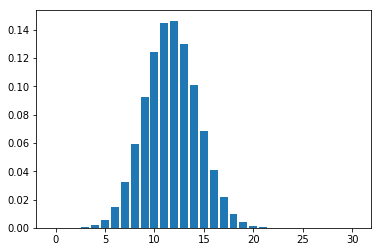

In [64]:
import scipy 
from scipy import linspace
from scipy.stats import binom

outcome_counts = linspace(0, 30, 31)
print(outcome_counts, '\n')

dist = binom.pmf(outcome_counts, 30, 0.39)
print(dist, '\n')

import matplotlib.pyplot as plt

plt.bar(outcome_counts, dist)
plt.show()

### Computing the mean of a Probability Distribution

In [65]:
# The mean of a probability distribution is N * p

dist_mean = 30*0.39
dist_mean

11.700000000000001

### Computing the Standard Deviation

In [66]:
# The Standard deviatio of a pmf is sqrt(N * p * q)

from math import sqrt
dist_stdev = sqrt(30*0.39*0.61)
dist_stdev

2.671516423307182

### A Different Plot

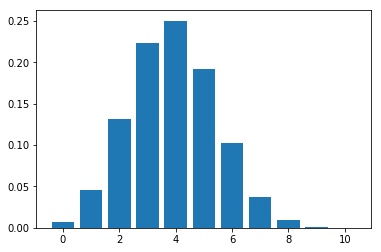

In [67]:
# Plotting pmf with 10 outcomes
outcome_counts = linspace(0, 10, 11)
dist = binom.pmf(outcome_counts, 10, 0.39)
plt.bar(outcome_counts, dist)
plt.show()

# Plotting pmf with 100 outcomes
outcome_counts = linspace(0, 100, 101)
dist = binom.pmf(outcome_counts, 100, 0.39)
plt.bar(outcome_counts, dist)
plt.show()

### The Normal Distribution

In [68]:
# Create a range of numbers from 0 to 100, with 101 elements (each number has one entry).
outcome_counts = scipy.linspace(0,100,101)

# Create a probability mass function along the outcome_counts.
outcome_probs = binom.pmf(outcome_counts,100,0.39)

# Plot a line, not a bar chart.
plt.plot(outcome_counts, outcome_probs)
plt.show()

### Cumulative Density Function

In [69]:
# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)
print(outcome_counts, '\n')

# Create the cumulative binomial probabilities, one for each entry in outcome_counts.
dist = binom.cdf(outcome_counts,30,0.39)
print(dist, '\n')

# Plotting the CDF
plt.plot(outcome_counts, dist)
plt.show()

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.] 

[3.62990326e-07 7.32526378e-06 7.18689628e-05 4.57014970e-04
 2.11914098e-03 7.64502875e-03 2.23656314e-02 5.46337441e-02
 1.13946238e-01 2.06642267e-01 3.31098083e-01 4.75771013e-01
 6.22222709e-01 7.51868472e-01 8.52518521e-01 9.21158554e-01
 9.62300377e-01 9.83962320e-01 9.93964693e-01 9.98003615e-01
 9.99423859e-01 9.99856251e-01 9.99969344e-01 9.99994493e-01
 9.99999183e-01 9.99999903e-01 9.99999991e-01 9.99999999e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00] 



### Faster way to Calculate Likelihood

In [70]:
left_16 = binom.cdf(16, 30, 0.39)
print(left_16)

right_16 = 1 - left_16
print(right_16)

0.9623003766054883
0.037699623394511717
